<a href="https://colab.research.google.com/github/christinapratas-ctrl/Stock-Market-Analysis/blob/main/fligh_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Flight Data from the Buffalo, NY Airport

### Author: Anna Bold, Kossi Gamli, Ran Xin Jiang, Christina Pratas
### Date : December 8th, 2025

## Executive Summary

In the following file, we will examine the flight data from the Buffalo Niagara International Airport in January 2025.

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
9. Discussion & Interpretation
10. Conclusion
11. References
12. Appendix

## Introduction
This projects examines flight records from Buffalo Niagara International Airport (BUF) for most of January 2025. The following 30 JSON files contain detailed information regarding flight schedules, scheduled arrival and departure times, airports, and aircraft information. The dataset shows how flights operated throughout the month, including patterns in delays, cancellations, airline performance, and schedule consistency. By organizing this raw data into a structured format, it highlights these trends and provides a clearer picture of BUF's activity during this period.

## Problem Statement / Research Question

The research question looks to find out what overlying issues the Buffalo Niagara International Airport may be having with the daily arriving and departing flights in January 2025. There are several different factors to look at, including potential problematic airlines, large discrepancies between scheduled departure/arrival times and actual departure/arrival times, and outlying flight cancellations.

The hypothesis will look to see if certain airlines, time of day, or gate placement within the airport have significance in potential delays or cancellations. The hypothesis will also look to see if any outside factors, such as inclement weather, may have resulted in delays or cancellations.

## Data Description

The data was presented in a series of 30 JSON files.

Combined, there were a total of 5509 rows of data and 46 columns of categories.

## Setup and Environment

In [ ]:
!pip install google-cloud-storage

In [ ]:
!git clone https://github.com/Iamkoss/cis9650_flight_data.git

fatal: destination path 'cis9650_flight_data' already exists and is not an empty directory.


In [ ]:
from google.cloud import storage
from io import BytesIO
from io import BytesIO
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os
import glob


## Data Loading

In [ ]:
# Find all BUF json files
files = sorted(glob.glob("/content/cis9650_flight_data/BUF*.json"))

#checking to see if all the files were successful found:
print("Files found:", files)
print("Number of files found:", len(files))

# Store each file's data as a *separate* DataFrame
flight_dfs = {}  # dictionary: file_name → DataFrame

for file in files:
    print("Loading:", (file))

    with open(file, "r") as f:
        data = json.load(f)

    df = pd.json_normalize(data)

    # Save each DataFrame with name like "BUF_1"
    key = os.path.basename(file).replace(".json", "")
    flight_dfs[key] = df

#checking to see that all keys were loaded correctly
print("\nLoaded files (keys):", list(flight_dfs.keys()))
print("Number of DataFrames loaded:", len(flight_dfs))

###combine all dataframes together
if len(flight_dfs) > 0:
  df_all = pd.concat(flight_dfs.values(), ignore_index=True)
  print("Combined: ", df_all.shape)
  df_all.head()
else:
  print("No DataFrames to combine.")

Files found: ['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_fl

In [ ]:
print(files)
print(len(files))

['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_flight_data/BUF

## Data Preparation

In [ ]:
display(df)

,flight_date,flight_status,aircraft,live,departure.airport,departure.timezone,departure.iata,departure.icao,departure.terminal,departure.gate,...,flight.codeshared.airline_iata,flight.codeshared.airline_icao,flight.codeshared.flight_number,flight.codeshared.flight_iata,flight.codeshared.flight_icao,flight.codeshared,aircraft.registration,aircraft.iata,aircraft.icao,aircraft.icao24
0,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,...,aa,aal,5312,aa5312,aal5312,NaN,NaN,NaN,NaN,NaN
1,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,...,NaN,NaN,NaN,NaN,NaN,NaN,N516AE,CRJ7,CRJ7,A677BE
2,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,5,...,NaN,NaN,NaN,NaN,NaN,NaN,N129AA,A321,A321,A07522
3,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,2A,...,NaN,NaN,NaN,NaN,NaN,NaN,N652RS,E145,E145,A895B0
4,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,8,...,b6,jbu,141,b6141,jbu141,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,7,...,b6,jbu,2001,b62001,jbu2001,NaN,NaN,NaN,NaN,NaN
169,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,N473UP,B752,B752,A5CE0F
170,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#clean up the entire data set (ie. fix the naming of some columns)

#making a copy of the master set (in case of mess up)
df = df_all.copy()
#replacting the column names from . to a _ for easier reading
df.columns = df.columns.str.lower().str.replace('.', '_')

# Removing all the fully empty columns
empty_cols = df.columns[df.isna().all()].tolist()
df = df.drop(columns=empty_cols)
#print("Dropped completely empty columns:", empty_cols)

#remove any duplicates from main set
df = df.drop_duplicates()
#print("After dropping duplicates:", df.shape)

df.head(10)




,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,departure_estimated,...,aircraft_registration,aircraft_iata,aircraft_icao,aircraft_icao24,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao
0,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,15,20.0,2025-01-05T05:00:00+00:00,2025-01-05T05:00:00+00:00,...,N8835Q,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,None,9.0,2025-01-05T00:00:00+00:00,2025-01-05T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05T05:23:00+00:00,2025-01-05T05:23:00+00:00,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05T05:23:00+00:00,2025-01-05T05:23:00+00:00,...,N534AE,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,16,4.0,2025-01-05T05:25:00+00:00,2025-01-05T05:25:00+00:00,...,N8919K,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,5,17.0,2025-01-05T06:00:00+00:00,2025-01-05T06:00:00+00:00,...,N179UW,A321,A321,A13C73,NaN,NaN,NaN,NaN,NaN,NaN
6,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,4,43.0,2025-01-05T06:00:00+00:00,2025-01-05T06:00:00+00:00,...,N430YX,E75L,E75L,A5255A,NaN,NaN,NaN,NaN,NaN,NaN
7,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,20,45.0,2025-01-05T06:00:00+00:00,2025-01-05T06:00:00+00:00,...,N815MD,E170,E170,AB1D06,NaN,NaN,NaN,NaN,NaN,NaN
8,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,12,57.0,2025-01-05T06:00:00+00:00,2025-01-05T06:00:00+00:00,...,N68843,B739,B739,A923EF,NaN,NaN,NaN,NaN,NaN,NaN
9,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,18,4.0,2025-01-05T06:00:00+00:00,2025-01-05T06:00:00+00:00,...,N950WN,B737,B737,AD36A8,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(df.head())
display(df.info())
df.isna().sum()


,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,departure_estimated,...,aircraft_registration,aircraft_iata,aircraft_icao,aircraft_icao24,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao
0,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,15,20.0,2025-01-05T05:00:00+00:00,2025-01-05T05:00:00+00:00,...,N8835Q,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,None,9.0,2025-01-05T00:00:00+00:00,2025-01-05T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05T05:23:00+00:00,2025-01-05T05:23:00+00:00,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05T05:23:00+00:00,2025-01-05T05:23:00+00:00,...,N534AE,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,16,4.0,2025-01-05T05:25:00+00:00,2025-01-05T05:25:00+00:00,...,N8919K,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flight_date                      5509 non-null   object 
 1   flight_status                    5509 non-null   object 
 2   departure_airport                5509 non-null   object 
 3   departure_timezone               5509 non-null   object 
 4   departure_iata                   5509 non-null   object 
 5   departure_icao                   5509 non-null   object 
 6   departure_gate                   4883 non-null   object 
 7   departure_delay                  4812 non-null   float64
 8   departure_scheduled              5509 non-null   object 
 9   departure_estimated              5509 non-null   object 
 10  departure_actual                 4145 non-null   object 
 11  departure_estimated_runway       4145 non-null   object 
 12  departure_actual_run

None

,0
flight_date,0
flight_status,0
departure_airport,0
departure_timezone,0
departure_iata,0
departure_icao,0
departure_gate,626
departure_delay,697
departure_scheduled,0
departure_estimated,0


In [ ]:
#convert the date and time columns to datetime

# Convert main flight date
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce')

# List of time columns to convert
time_columns = [
    'departure_scheduled', 'departure_estimated', 'departure_actual',
    'arrival_scheduled', 'arrival_estimated', 'arrival_actual'
]

# Convert each to datetime
for col in time_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[['flight_date', 'departure_scheduled', 'departure_actual', 'arrival_scheduled', 'arrival_actual']].head()

,flight_date,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
0,2025-01-05,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00
1,2025-01-05,2025-01-05 00:00:00+00:00,NaT,2025-01-05 01:04:00+00:00,NaT
2,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
3,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
4,2025-01-05,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00


In [ ]:
#calculate delay time in minutes

# Departure delay in minutes
df['dep_delay_min'] = (
    (df['departure_actual'] - df['departure_scheduled'])
    .dt.total_seconds() / 60
)

# Arrival delay in minutes
df['arr_delay_min'] = (
    (df['arrival_actual'] - df['arrival_scheduled'])
    .dt.total_seconds() / 60
)

print("The negative value means the flight either arrived/departed early.")

df[['departure_scheduled', 'departure_actual', 'dep_delay_min',
    'arrival_scheduled', 'arrival_actual', 'arr_delay_min']].head()

The negative value means the flight either arrived/departed early.


,departure_scheduled,departure_actual,dep_delay_min,arrival_scheduled,arrival_actual,arr_delay_min
0,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,20.0,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00,-17.0
1,2025-01-05 00:00:00+00:00,NaT,NaN,2025-01-05 01:04:00+00:00,NaT,NaN
2,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
3,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
4,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,3.0,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00,-25.0


In [ ]:
#handle missing values:

#  fill in missing gate terminal/gate information
#df['departure_terminal'] = df['departure_terminal'].fillna("Unknown")
df['departure_gate'] = df['departure_gate'].fillna("Unknown")

# Drop flights missing flight_status (dropping flights that do not have a flight status; prob will not happen, but checking in case)
df = df.dropna(subset=['flight_status'])


print("Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.")
df.isna().sum().head(15)


Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.


,0
flight_date,0
flight_status,0
departure_airport,0
departure_timezone,0
departure_iata,0
departure_icao,0
departure_gate,0
departure_delay,697
departure_scheduled,0
departure_estimated,0


In [ ]:
display(df)

,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,departure_estimated,...,aircraft_icao,aircraft_icao24,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao,dep_delay_min,arr_delay_min
0,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,15,20.0,2025-01-05 05:00:00+00:00,2025-01-05 05:00:00+00:00,...,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-17.0
1,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,9.0,2025-01-05 00:00:00+00:00,2025-01-05 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05 05:23:00+00:00,2025-01-05 05:23:00+00:00,...,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163,37.0,-4.0
3,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05 05:23:00+00:00,2025-01-05 05:23:00+00:00,...,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,37.0,-4.0
4,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,16,4.0,2025-01-05 05:25:00+00:00,2025-01-05 05:25:00+00:00,...,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,2025-01-28,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,7,41.0,2025-01-28 19:55:00+00:00,2025-01-28 19:55:00+00:00,...,NaN,NaN,jetblue airways,b6,jbu,2001,b62001,jbu2001,40.0,NaN
5505,2025-01-28,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,15.0,2025-01-28 23:32:00+00:00,2025-01-28 23:32:00+00:00,...,B752,A5CE0F,NaN,NaN,NaN,NaN,NaN,NaN,22.0,6.0
5506,2025-01-28,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,55.0,2025-01-28 17:00:00+00:00,2025-01-28 17:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5507,2025-01-28,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,10.0,2025-01-28 23:33:00+00:00,2025-01-28 23:33:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Model Planning

In [ ]:
#adding a flag (true/false) if a flight was cancelled so we can use it to analyze cancellation rates

#marks either true or false
df['is_cancelled'] = df['flight_status'].eq('cancelled')

print("Cancellation flag created.")
df[['flight_status', 'is_cancelled']].head(100)

#This cell was cut as the table just shows that flights that were marked as 'landed' were not marked as 'cancelled'.

Cancellation flag created.


,flight_status,is_cancelled
0,landed,False
1,landed,False
2,landed,False
3,landed,False
4,landed,False
...,...,...
95,landed,False
96,landed,False
97,landed,False
98,landed,False


In [ ]:
#overview of entire data set
#___________________________
total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()

# Delayed = actual departure or arrival time does NOT match scheduled time (and not cancelled)
total_delayed = (
    (~df['is_cancelled']) &
    (
        (df['dep_delay_min'].notna() & (df['dep_delay_min'] > 0)) |
        (df['arr_delay_min'].notna() & (df['arr_delay_min'] > 0))
    )
).sum()

num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Flight Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({(total_cancelled/total_flights)*100:.2f}%)")
print(f"Total delayed flights (non-cancelled, actual != scheduled): {total_delayed} ({(total_delayed/total_flights)*100:.2f}%)")
print(f"Number of airlines: {num_airlines}")

num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Flight Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({(total_cancelled/total_flights)*100:.2f}%)")
print(f"Total delayed flights (non-cancelled, actual != scheduled): {total_delayed} ({(total_delayed/total_flights)*100:.2f}%)")
print(f"Number of airlines: {num_airlines}")

df[['airline_name', 'flight_status', 'dep_delay_min', 'arr_delay_min']].head()

---- BUF Airport Flight Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Total delayed flights (non-cancelled, actual ≠ scheduled): 3814 (69.23%)
Number of airlines: 106
---- BUF Airport Flight Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Total delayed flights (non-cancelled, actual ≠ scheduled): 3814 (69.23%)
Number of airlines: 106


,airline_name,flight_status,dep_delay_min,arr_delay_min
0,Southwest Airlines,landed,20.0,-17.0
1,empty,landed,NaN,NaN
2,AlphaSky,landed,37.0,-4.0
3,American Airlines,landed,37.0,-4.0
4,Southwest Airlines,landed,3.0,-25.0


In [ ]:
#total number of flights by airline
#__________________________________
flights_per_airline = df['airline_name'].value_counts()
print(flights_per_airline)

airline_name
American Airlines     414
Delta Air Lines       384
Southwest Airlines    375
JetBlue Airways       259
United Airlines       258
                     ... 
SkyCare                 1
Omni Air Transport      1
CommutAir               1
Sky Quest               1
Rennia Aviation         1
Name: count, Length: 106, dtype: int64


In [ ]:
# Overview of cancellation info

total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()
cancel_rate = (total_cancelled / total_flights) * 100
num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Cancellation Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({cancel_rate:.2f}%)")
print(f"Number of airlines: {num_airlines}")

# Quick peek at flight status
display(df[['airline_name', 'flight_status']].head())

# ------- Cancellations by airline ----------

cancel_by_airline = (
    df.groupby('airline_name')['is_cancelled']
    .mean()
    .sort_values(ascending=False) * 100
)

print("\n---- Cancellation Rate by Airline (% cancelled) ----")
display(cancel_by_airline)

# number of cancelled flights by airline
cancel_counts = df.groupby('airline_name')['is_cancelled'].sum().sort_values(ascending=False)
print("\n---- Number of Cancelled Flights by Airline ----")
display(cancel_counts)

#cancellations by date

cancel_by_date = df.groupby('flight_date')['is_cancelled'].mean() * 100

print("\n---- Top 10 Dates by Cancellation Rate (% cancelled) ----")
display(cancel_by_date.sort_values(ascending=False).head(10))


---- BUF Airport Cancellation Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Number of airlines: 106


,airline_name,flight_status
0,Southwest Airlines,landed
1,empty,landed
2,AlphaSky,landed
3,American Airlines,landed
4,Southwest Airlines,landed



---- Cancellation Rate by Airline (% cancelled) ----


,is_cancelled
airline_name,
Emirates,6.666667
Copa Airlines,3.773585
Volaris,3.703704
SA AVIANCA,3.488372
Brussels Airlines,3.333333
...,...
Ventura,0.000000
Wheels Up,0.000000
Zenflight,0.000000



---- Number of Cancelled Flights by Airline ----


,is_cancelled
airline_name,
American Airlines,8
United Airlines,8
Copa Airlines,4
AlphaSky,4
SA AVIANCA,3
...,...
Ventura,0
Wheels Up,0
Zenflight,0



---- Top 10 Dates by Cancellation Rate (% cancelled) ----


,is_cancelled
flight_date,
2025-01-06,9.047619
2025-01-22,4.891304
2025-01-19,4.265403
2025-01-07,2.777778
2025-01-10,2.577320
2025-01-11,1.621622
2025-01-21,0.555556
2025-01-13,0.526316
2025-01-03,0.512821


In [ ]:

# Delay Analysis Overview
# ---------------------------------------

# 1) Numeric delay summary (minutes) for flights that actually departed
#    (exclude cancelled + missing actual departure times)

df_departed = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

print("Flights that actually departed (with dep delay data):", len(df_departed))
display(df_departed.head())

# Extract delay columns from df_departed
dep_delays = df['dep_delay_min']
arr_delays = df['arr_delay_min']

print("\n---- Departure Delay (Minutes) ----")
print(f"Number of departed flights with delay data: {len(dep_delays)}")
print(f"Average departure delay: {dep_delays.mean():.2f} min")
print(f"Median departure delay: {dep_delays.median():.2f} min")
print(f"90th percentile departure delay: {dep_delays.quantile(0.90):.2f} min")

print("\n---- Arrival Delay (Minutes) ----")
print(f"Number of flights with arrival delay data: {len(arr_delays)}")
print(f"Average arrival delay: {arr_delays.mean():.2f} min")
print(f"Median arrival delay: {arr_delays.median():.2f} min")
print(f"90th percentile arrival delay: {arr_delays.quantile(0.90):.2f} min")

# 2) Define "delayed" using your chosen rule:
#    A flight is delayed if actual departure OR arrival time != scheduled


df['is_delayed_exact'] = (
    (df['departure_actual'] != df['departure_scheduled']) |
    (df['arrival_actual'] != df['arrival_scheduled'])
)

# Percentage of delayed flights (based on exact time mismatch)
num_delayed = df['is_delayed_exact'].sum()
total_flights = len(df)
percent_delayed = (num_delayed / total_flights) * 100

print("\n---- Delay Summary (Exact Match Definition) ----")
print(f"Total flights: {total_flights}")
print(f"Delayed flights (actual ≠ scheduled): {num_delayed}")
print(f"Percentage delayed: {percent_delayed:.2f}%")

# Show first few delayed flights with their time differences
display(df[df['is_delayed_exact']][[
    'airline_name',
    'flight_iata',
    'departure_scheduled',
    'departure_actual',
    'arrival_scheduled',
    'arrival_actual'
]].head())

# 3) Delays by airline (using is_delayed_exact)

airline_delay_stats = df.groupby('airline_name').agg(
    total_flights=('airline_name', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

airline_delay_stats['delay_rate (%)'] = (
    airline_delay_stats['delayed_flights'] /
    airline_delay_stats['total_flights'] * 100
)

airline_delay_stats = airline_delay_stats.sort_values('delay_rate (%)', ascending=False)

print("\n---- Delay Rate by Airline (Actual ≠ Scheduled) ----")
display(airline_delay_stats)

# 4) Delays by specific days (helpful for potential weather impact)

daily_delay_stats = df.groupby('flight_date').agg(
    total_flights=('flight_date', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

daily_delay_stats['delay_rate (%)'] = (
    daily_delay_stats['delayed_flights'] /
    daily_delay_stats['total_flights'] * 100
)

print("\n---- Top 10 Days by Delay Rate ----")
display(daily_delay_stats.sort_values('delay_rate (%)', ascending=False).head(10))

Flights that actually departed (with dep delay data): 4145


,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,departure_estimated,...,aircraft_icao24,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao,dep_delay_min,arr_delay_min,is_cancelled
0,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,15,20.0,2025-01-05 05:00:00+00:00,2025-01-05 05:00:00+00:00,...,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-17.0,False
2,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05 05:23:00+00:00,2025-01-05 05:23:00+00:00,...,NaN,american airlines,aa,aal,5163,aa5163,aal5163,37.0,-4.0,False
3,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,11,38.0,2025-01-05 05:23:00+00:00,2025-01-05 05:23:00+00:00,...,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,37.0,-4.0,False
4,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,16,4.0,2025-01-05 05:25:00+00:00,2025-01-05 05:25:00+00:00,...,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-25.0,False
5,2025-01-05,landed,Buffalo Niagara International,America/New_York,BUF,KBUF,5,17.0,2025-01-05 06:00:00+00:00,2025-01-05 06:00:00+00:00,...,A13C73,NaN,NaN,NaN,NaN,NaN,NaN,17.0,-26.0,False



---- Departure Delay (Minutes) ----
Number of departed flights with delay data: 5509
Average departure delay: 27.25 min
Median departure delay: 20.00 min
90th percentile departure delay: 65.00 min

---- Arrival Delay (Minutes) ----
Number of flights with arrival delay data: 5509
Average arrival delay: -10.89 min
Median arrival delay: -14.00 min
90th percentile arrival delay: 21.00 min

---- Delay Summary (Exact Match Definition) ----
Total flights: 5509
Delayed flights (actual ≠ scheduled): 5509
Percentage delayed: 100.00%


,airline_name,flight_iata,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
0,Southwest Airlines,WN3010,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00
1,empty,None,2025-01-05 00:00:00+00:00,NaT,2025-01-05 01:04:00+00:00,NaT
2,AlphaSky,AS6125,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
3,American Airlines,AA5163,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
4,Southwest Airlines,WN1357,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00



---- Delay Rate by Airline (Actual ≠ Scheduled) ----


,total_flights,delayed_flights,delay_rate (%)
airline_name,,,
ANA,43,43,100.0
Aer Lingus,100,100,100.0
Aeromexico,131,131,100.0
Air Canada,81,81,100.0
Air Care Alliance,1,1,100.0
...,...,...,...
WestJet,69,69,100.0
Wheels Up,16,16,100.0
Zenflight,1,1,100.0



---- Top 10 Days by Delay Rate ----


,total_flights,delayed_flights,delay_rate (%)
flight_date,,,
2025-01-01,149,149,100.0
2025-01-03,195,195,100.0
2025-01-04,193,193,100.0
2025-01-05,219,219,100.0
2025-01-06,210,210,100.0
2025-01-07,180,180,100.0
2025-01-08,181,181,100.0
2025-01-09,198,198,100.0
2025-01-10,194,194,100.0


In [ ]:
#time of day (morning/midday/night) delay

# Extract hour from actual departure time
df['departure_hour'] = df['departure_actual'].dt.hour

def get_time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 0 <= hour < 6:
        return "Night (0–5)"
    elif 6 <= hour < 12:
        return "Morning (6–11)"
    elif 12 <= hour < 18:
        return "Afternoon (12–17)"
    else:
        return "Evening (18–23)"

df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)

time_of_day_stats = df.groupby('time_of_day').agg(
    total_flights=('time_of_day', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

time_of_day_stats['delay_rate (%)'] = (
    time_of_day_stats['delayed_flights'] /
    time_of_day_stats['total_flights'] * 100
)

display(time_of_day_stats.sort_values('delay_rate (%)', ascending=False))

,total_flights,delayed_flights,delay_rate (%)
time_of_day,,,
Afternoon (12–17),1858,1858,100.0
Evening (18–23),769,769,100.0
Morning (6–11),1466,1466,100.0
Night (0–5),52,52,100.0
Unknown,1364,1364,100.0


In [ ]:

# ---- GATE PERFORMANCE ----

df_gate = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

gate_stats = df_gate.groupby('departure_gate').agg(
    total_flights=('dep_delay_min', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    med_dep_delay=('dep_delay_min', 'median'),
)

gate_cancel_rate = (
    df.groupby('departure_gate')['is_cancelled']
    .mean() * 100
)

gate_stats['cancel_rate (%)'] = gate_cancel_rate

# Sort by worst delay
gate_stats = gate_stats.sort_values('avg_dep_delay', ascending=False)

print("=== Gate Performance (Delays & Cancellations) ===")
display(gate_stats.head(20))  # show top 20 worst gates

=== Gate Performance (Delays & Cancellations) ===


,total_flights,avg_dep_delay,med_dep_delay,cancel_rate (%)
departure_gate,,,,
1,3,76.000000,102.0,0.000000
14,10,60.500000,64.0,23.076923
21,26,57.961538,31.0,0.000000
19,23,38.652174,20.0,0.000000
9,117,37.615385,22.0,0.000000
2,60,36.483333,24.0,0.000000
10,224,35.482143,24.0,2.047782
26,117,35.350427,28.0,0.000000
20,257,33.548638,19.0,0.000000


In [ ]:
#destination performcance (seeing if certain destinations had a higher delay time)

# ---- DESTINATION PERFORMANCE ----

# Only flights that have a destination airport
df_dest = df.copy()

# Group by arrival airport (destination)
dest_stats = df_dest.groupby('arrival_airport').agg(
    total_flights=('flight_status', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    avg_arr_delay=('arr_delay_min', 'mean'),
    cancellations=('is_cancelled', 'sum'),
    cancel_rate=('is_cancelled', 'mean'),
)

# Convert cancel_rate to %
dest_stats['cancel_rate'] = dest_stats['cancel_rate'] * 100

# Sort by worst arrival delay
dest_stats_sorted = dest_stats.sort_values('avg_arr_delay', ascending=False)

print("=== Destination Performance (Sorted by Arrival Delay) ===")
display(dest_stats_sorted.head(15))   # Show top 15 worst destinations


worst_arrivals = dest_stats.sort_values('avg_arr_delay', ascending=False).head(10)
print("=== Top 10 Worst Destinations by Arrival Delay ===")
display(worst_arrivals)


worst_cancel_routes = dest_stats.sort_values('cancel_rate', ascending=False).head(10)
print("=== Top 10 Destinations with Highest Cancellation Rate ===")
display(worst_cancel_routes)


=== Destination Performance (Sorted by Arrival Delay) ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
Atlantic City International,2,5.500000,42.000000,0,0.0
Mineta San Jose International Airport,1,35.000000,26.000000,0,0.0
Lambert-St. Louis International,2,24.000000,26.000000,0,0.0
Buffalo Niagara International,3,29.500000,20.000000,0,0.0
Pittsburgh International,5,66.500000,14.000000,1,20.0
Elmira Corning Regional,18,30.375000,12.200000,0,0.0
Richmond International Airport,3,18.000000,10.500000,0,0.0
Love Field,5,3.500000,9.000000,0,0.0
Los Angeles International,10,39.600000,8.800000,0,0.0


=== Top 10 Worst Destinations by Arrival Delay ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
Atlantic City International,2,5.500,42.0,0,0.0
Mineta San Jose International Airport,1,35.000,26.0,0,0.0
Lambert-St. Louis International,2,24.000,26.0,0,0.0
Buffalo Niagara International,3,29.500,20.0,0,0.0
Pittsburgh International,5,66.500,14.0,1,20.0
Elmira Corning Regional,18,30.375,12.2,0,0.0
Richmond International Airport,3,18.000,10.5,0,0.0
Love Field,5,3.500,9.0,0,0.0
Los Angeles International,10,39.600,8.8,0,0.0


=== Top 10 Destinations with Highest Cancellation Rate ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
T. F. Green Airport,4,17.500000,-6.500000,1,25.000000
Pittsburgh International,5,66.500000,14.000000,1,20.000000
Ronald Reagan Washington National Airport,163,30.773196,-3.254902,10,6.134969
Washington Dulles International,287,37.561983,-5.037037,14,4.878049
Baltimore/Washington International Thurgood Marshall,125,17.582524,-11.957447,3,2.400000
Hartsfield-jackson Atlanta International,557,30.948454,-5.199074,12,2.154399
Chicago O'hare International,585,27.925439,-19.685393,7,1.196581
Charlotte Douglas,91,23.000000,-14.030303,1,1.098901
Newark Liberty International,185,24.173333,-19.816092,2,1.081081


## Model building / Analysis

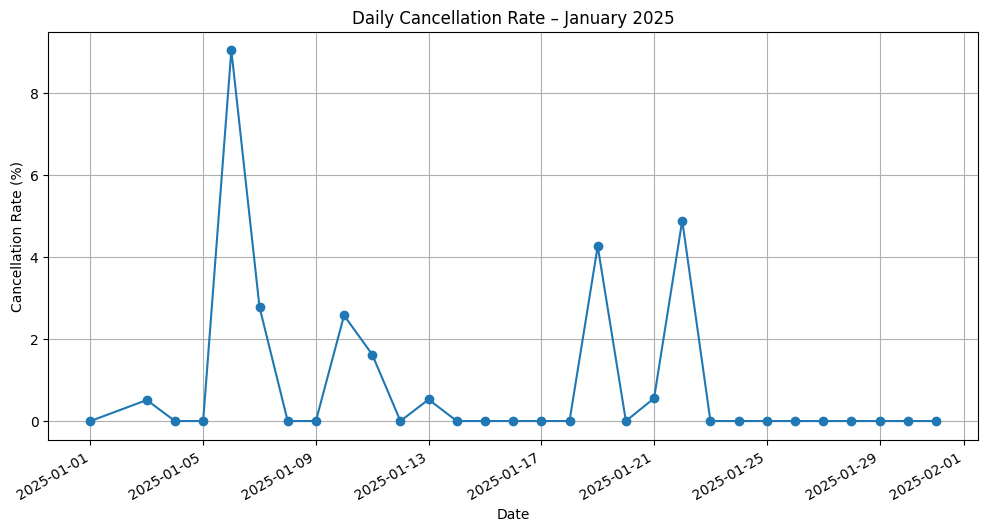

In [ ]:
#cancellations by date in Jan:



plt.figure(figsize=(12,6))
cancel_by_date.plot(marker='o')
plt.title('Daily Cancellation Rate – January 2025')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

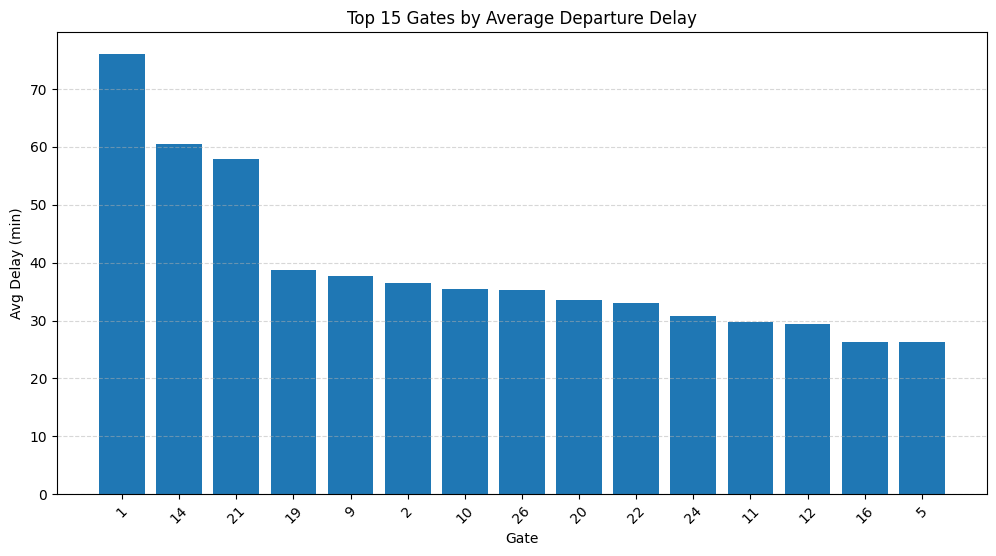

In [ ]:
#chart for gate delay:


top_gates = gate_stats.head(15)

plt.figure(figsize=(12,6))
plt.bar(top_gates.index, top_gates['avg_dep_delay'])
plt.title("Top 15 Gates by Average Departure Delay")
plt.xlabel("Gate")
plt.ylabel("Avg Delay (min)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


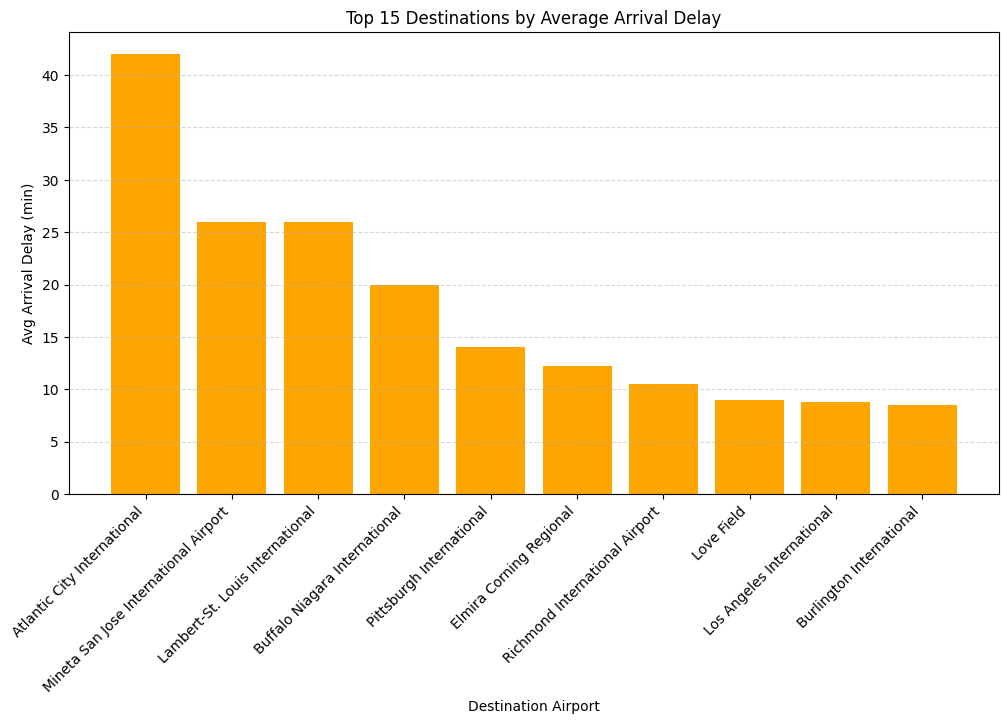

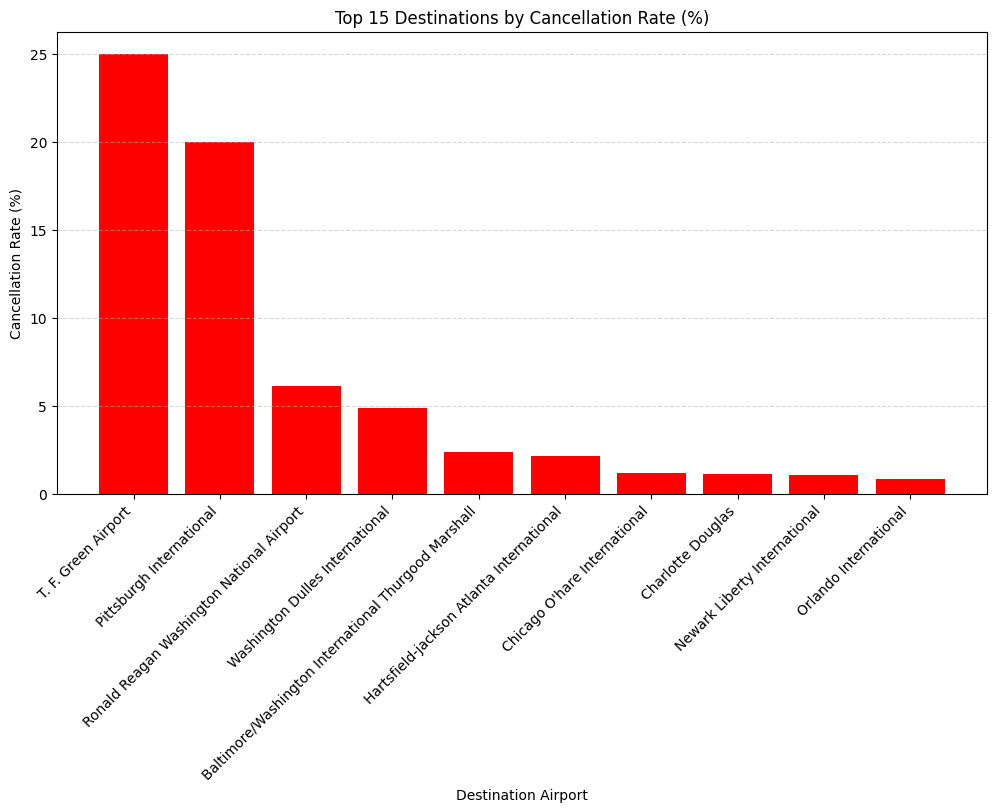

In [ ]:
#array delay by destination

top15_dest = worst_arrivals.head(15)

plt.figure(figsize=(12,6))
plt.bar(top15_dest.index, top15_dest['avg_arr_delay'], color='orange')
plt.title("Top 15 Destinations by Average Arrival Delay")
plt.xlabel("Destination Airport")
plt.ylabel("Avg Arrival Delay (min)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



#cancellation rate by destination:

top15_cancel = worst_cancel_routes.head(15)

plt.figure(figsize=(12,6))
plt.bar(top15_cancel.index, top15_cancel['cancel_rate'], color='red')
plt.title("Top 15 Destinations by Cancellation Rate (%)")
plt.xlabel("Destination Airport")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



## Discussion and Results

At the Buffalo Niagara International Airport in January 2025, there were a total number of 5,509 flights and 106 airlines that connected with BUF.

In regards to cancelled flights:
There were 53 cancelled flights, less than 1% of total flights.
The data was not significant enough to draw any useful conclusions. American and United Airlines had the highest number of cancelled flights, but they are also in the top five of airlines servicing this airport, so the conclusion is also negligible.

The days with the most cancelled flights also line up with inclement weather in Buffalo: January 6, 2025 had a snowstorm, and January 22, 2025 had a large freeze (Reference 2). Thus we conclude that cancellations are most significantly weather related.

In regards to delayed departing flights:
The total number of delayed flights was 3,814, or ~70%.
This is above the national average for January 2025, where 78% of flights were considered to be “on time.” (Reference 4)

The mean time of departure delays was 27.25 minutes, while the median time of departure delays was 20 minutes. Only flights in the 90th percentile had a delay of 65 minutes or more. Thus, most departure delays were only minorly inconvenient.

What we would do in the future is filter out flights that were delayed by less than 15 minutes, to see how that has adjusted the data. With our median and mean flights being around 20 minutes, it would probably decrease the total percentage of flights to be more in line with the national statistics.

In regards to arriving flights:
The mean time of arrival delays was -11 minutes. The median time of arrival delays was -14 minutes minutes. Only flights in the 90th percentile had a delay of 20 minutes of more. Thus, most arrival delays were actually arriving ahead of schedule, with only a small amount arriving after their initially scheduled time.

If, in the future, we filtered our departure delay data, we could also filter the arrival delay data to reflect only positive values and more closely examine new variables to show the pain points of positive arrival delays.  

The gates with the highest average delays were gates 1, 14 and 21. However, gate 1 (situated at the very end of the terminal) only had 3 flights, making its high delay amount an outlier. Similarly, gates 14 and 21 had few flights, also skewing their numbers. Gates with larger amounts of flights (100+) found themselves more in the middle of the table.
Gate 9, the highest delayed gate with 100+ flight data points is a gate that does not belong to a specific airline, and thus could be assigned to any airline. This lines up with our data showing that many of delayed flights corresponding to the non-major US carriers that had their own gates (Frontier, American, JetBlue, United, Delta and Southwest).  (Reference 3)

## Conclusion

Throughout our analysis, we considered how to best optimize the Buffalo Niagara International Airport considering delay time in both departures and arrivals, gate location, time of day and more. What we had initially set out in our hypothesis was to examine to see if there were any specific airlines, large discrepancies between scheduled and actual departure/arrival times and specific gates that were most at fault.

To do so, we broke down the daily information and calculated differences in the scheduled departure and arrival times and the actual departure and arrival times. We also specifically calculated cancellation rates by date. We then separated the data by airlines, airports (both destinations and start of journey) and gate numbers.

Overall, our data shows that Buffalo Niagara International Airport has above-average flight delays (compared to the national average). The flight delays are spread across airlines, gates and times of day. Though some delays and cancellations were effected by weather (something that can’t be controlled by the airport), the rest of the data posits that there are greater inefficiencies within the Buffalo Airport that are not reflected in the flight data that are causing flight delays.

To make a recommendation, we could suggest lowering the amount of United flights in favor of more Delta flights, as United was shown to have more delay times and negatively affect the data mores than the other major carriers.

Our other recommendation would be to lower the number of flights to small regional airports, as those were more likely to have higher amount of delays and cancellations.

Finally, we would recommend looking at other data in the airport, such as TSA line times, public transportation delays and amount of parking. Solving inefficiencies in those areas could lead to a reduction of delays across the entire airport.  

## References

1. https://www.geeksforgeeks.org/python/line-chart-in-matplotlib-python/

2. https://weatherspark.com/h/m/20372/2025/1/Historical-Weather-in-January-2025-in-Buffalo-New-York-United-States
* Weather in Buffalo, NY in January 2025

3. https://buffaloairport.com/traveler-info/in-the-terminal/airport-maps
* BUF Airport information

4. https://www.transtats.bts.gov/ot_delay/OT_DelayCause1.asp?20=E
* National flight delay data for January 2025

6. https://www.geeksforgeeks.org/git/what-is-readme-md-file/

7. McKinney, Wes. “Data Structures for Statistical Computing in Python.” SciPy (2010)

8. Harris, C.R. et al. (2020). Array programming with NumPy. Nature, 585(7825), 357–362.

9. Han, J., Kamber, M., & Pei, J. (2012). Data Mining: Concepts and Techniques (3rd ed.). Morgan Kaufmann.


## Appendix

In [ ]:
#delays based on gate/terminal used:

#---- TERMINAL PERFORMANCE ----

# Only consider flights that actually departed (not cancelled)
df_terminal = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

terminal_stats = df_terminal.groupby('departure_terminal').agg(
    total_flights=('dep_delay_min', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    med_dep_delay=('dep_delay_min', 'median'),
)

# Add cancellation rate for each terminal
terminal_cancel_rate = (
    df.groupby('departure_terminal')['is_cancelled']
    .mean() * 100
)

terminal_stats['cancel_rate (%)'] = terminal_cancel_rate

# Final sorted table (worst-performing first)
terminal_stats = terminal_stats.sort_values('avg_dep_delay', ascending=False)

print("=== Terminal Performance (Delays & Cancellations) ===")
display(terminal_stats)

#This cell was cut as there is only one terminal at the BUF airport and all files have "NULL" for their terminal

KeyError: 'departure_terminal'